In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from physiologicalModel import tobler, energyExpenditure, o2Consumption, remainingO2, timeElapsed

In [2]:
astroWeight = (175+180)*(0.45359237) # (person + suit lbs)*conversion = kg

In [3]:
gridLength = 20000/4000

In [4]:
xCoords = np.arange(1,4001)

In [5]:
df = pd.read_csv('slopeFinal.csv')

In [6]:
df.columns = xCoords

In [7]:
#df.head()

In [8]:
df.drop(df.tail(2999).index,inplace=True)

In [9]:
#df.head()

In [10]:
df = df.iloc[:,994:-1450]

In [11]:
# Excel coords
initialLocation = (df.columns.get_loc(2500), 1000-750)
scienceLocation = (359, 1000-267)

In [12]:
# 3 inflection points
iPoint1 = (df.columns.get_loc(2100), 1000-300)
iPoint2 = (df.columns.get_loc(1900),1000-450)
iPoint3 = (df.columns.get_loc(1900),1000-600)

In [13]:
#df.head()

In [14]:
b = np.arange(0,len(df.columns))
df.columns = b

In [15]:
#df.head()

In [16]:
#df.to_csv('slopeFinalModified.csv',index=False)

https://math.libretexts.org/Courses/Angelo_State_University/Mathematical_Computing_with_Python/3%3A_Interpolation_and_Curve_Fitting/3.2%3A_Polynomial_Interpolation

In [17]:
def f(o):

  b0=y[0]

  b1=(y[1]-y[0])/(x[1]-x[0])

  b1p=(y[2]-y[1])/(x[2]-x[1])

  b2=(b1p-b1)/(x[2]-x[0])

  poly=b0+b1*(o-x[0])+b2*(o-x[0])*(o-x[1])

  return poly

In [18]:
linLength = 10000
totalO2 = 270

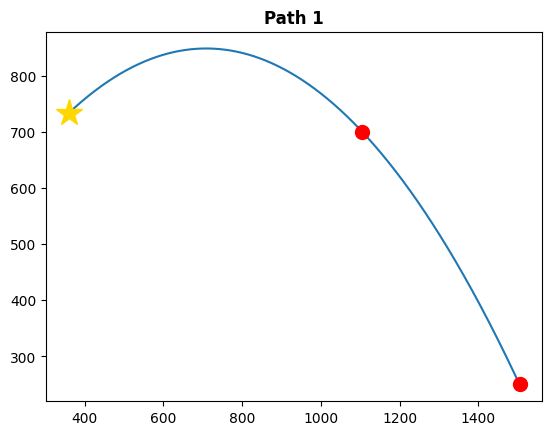

In [19]:
x=[initialLocation[0], iPoint1[0], scienceLocation[0]]

y=[initialLocation[1], iPoint1[1], scienceLocation[1]]

n=len(x)-1

prange1 = np.linspace(min(x),max(x),linLength)
yVals1 = [round(x) for x in f(prange1)]

plt.plot(prange1,f(prange1))

plt.plot(x[0:-1],y[0:-1],marker='o', color='r', ls='', markersize=10)

plt.plot(x[-1],y[-1],marker='*', color='gold', ls='', markersize=20)

plt.title("Path 1",weight = 'bold')

plt.show()


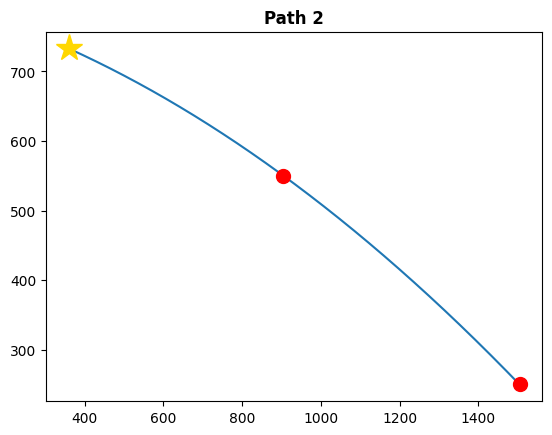

In [20]:
x=[initialLocation[0], iPoint2[0], scienceLocation[0]]

y=[initialLocation[1], iPoint2[1], scienceLocation[1]]

n=len(x)-1

prange2 = np.linspace(min(x),max(x),linLength)
yVals2 = [round(x) for x in f(prange2)]

plt.plot(prange2,f(prange2))

plt.plot(x[0:-1],y[0:-1],marker='o', color='r', ls='', markersize=10)

plt.plot(x[-1],y[-1],marker='*', color='gold', ls='', markersize=20)

plt.title("Path 2",weight='bold')

plt.show()

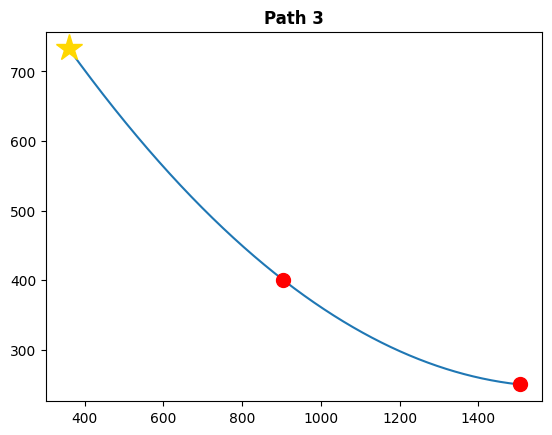

In [21]:
x=[initialLocation[0], iPoint3[0], scienceLocation[0]]

y=[initialLocation[1], iPoint3[1], scienceLocation[1]]

n=len(x)-1

prange3 = np.linspace(min(x),max(x),linLength)
yVals3 = [round(x) for x in f(prange3)]


plt.plot(prange3,f(prange3))

plt.plot(x[0:-1],y[0:-1],marker='o', color='r', ls='', markersize=10)

plt.plot(x[-1],y[-1],marker='*', color='gold', ls='', markersize=20)

plt.title("Path 3",weight='bold')

plt.show()

In [22]:
xVals1 = [round(x) for x in prange1]
xVals2 = [round(x) for x in prange2]
xVals3 = [round(x) for x in prange3]

In [23]:
# Reverse since moving from right to left
xVals1.reverse()
xVals2.reverse()
xVals3.reverse()
yVals1.reverse()
yVals2.reverse()
yVals3.reverse()

In [24]:
xVals1m = [round(x*gridLength) for x in xVals1]
xVals2m = [round(x*gridLength) for x in xVals2]
xVals3m = [round(x*gridLength) for x in xVals3]

yVals1m = [round(x*gridLength) for x in yVals1]
yVals2m = [round(x*gridLength) for x in yVals2]
yVals3m = [round(x*gridLength) for x in yVals3]

In [25]:
iCoords1 = []
iCoords2 = []
iCoords3 = []

for index,val in enumerate(xVals1):
    iCoords1.append([val,yVals1[index]])

for index,val in enumerate(xVals2):
    iCoords2.append([val,yVals2[index]])

for index,val in enumerate(xVals3):
    iCoords3.append([val,yVals3[index]])

In [26]:
iCoords1m = []
iCoords2m = []
iCoords3m = []

for index,val in enumerate(xVals1m):
    iCoords1m.append([val,yVals1m[index]])

for index,val in enumerate(xVals2m):
    iCoords2m.append([val,yVals2m[index]])

for index,val in enumerate(xVals3m):
    iCoords3m.append([val,yVals3m[index]])

In [27]:
from functools import reduce

path1Distance = reduce(lambda p1, p2: np.linalg.norm(p1 - p2), np.array(iCoords1m))
path1NodeLength = path1Distance/linLength

In [28]:
path2Distance = reduce(lambda p1, p2: np.linalg.norm(p1 - p2), np.array(iCoords2m))
path2NodeLength = path2Distance/linLength

In [29]:
path3Distance = reduce(lambda p1, p2: np.linalg.norm(p1 - p2), np.array(iCoords3m))
path3NodeLength = path3Distance/linLength

In [30]:
distanceTraveled = 0
distanceTraveledIntermediate = 0
counter = 0
time = 0
dt = 1
metabolicRate = []
o2Consumed = []

while distanceTraveled < path1Distance:
   
    walking_speed,dh_dx = tobler(df.iloc[999-iCoords1[counter][1],iCoords1[counter][0]])
    met_rate = energyExpenditure(astroWeight,walking_speed,dh_dx)
    metabolicRate.append(met_rate)
    o2_consumption = o2Consumption(met_rate,dt)
    o2Consumed.append(o2_consumption)
    
    S = walking_speed*(5/18) # m/s
    distance = S*dt # m
    distanceTraveled += distance
    distanceTraveledIntermediate += distance
    time = timeElapsed(time,dt)
    
    #print(f"Distance Traveled: {distanceTraveled}, Slope: {df.iloc[999-iCoords1[counter][1],iCoords1[counter][0]]}")

    if distanceTraveledIntermediate >= path1NodeLength:
        counter += 1
        distanceTraveledIntermediate = 0

    else:
        pass


In [31]:
time1 = time 
scienceTime = 0
scienceMetRate = 267

while scienceTime < 30*60:
    # met_rate = energyExpenditure(100,walking_speed=0,dh_dx=0)
    # https://ntrs.nasa.gov/citations/19760005584
    met_rate = scienceMetRate/3600
    metabolicRate.append(met_rate)
    o2_consumption = o2Consumption(met_rate,dt)
    o2Consumed.append(o2_consumption)
    scienceTime+=dt
    time = timeElapsed(time,dt)

    if scienceTime >= 20*60:
        scienceMetRate = 289

peakMetabolicRate = max(metabolicRate)
metabolicRate.extend(list(reversed(metabolicRate[0:time1])))
o2Consumed.extend(list(reversed(o2Consumed[0:time1])))

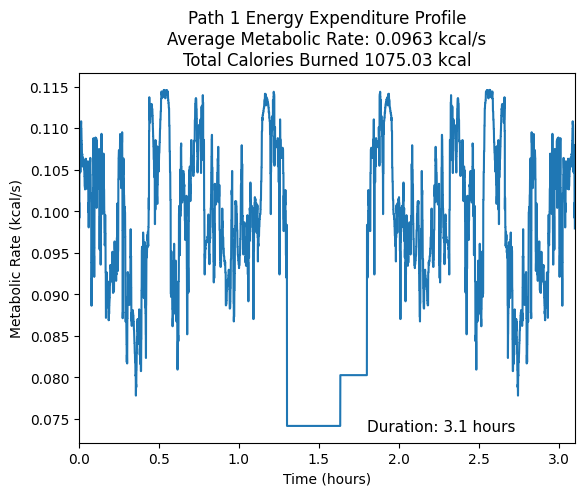

In [32]:
plt.plot(np.arange(1,time+1+time1)/3600,metabolicRate)
#plt.plot((metabolicRate.index(peakMetabolicRate)+1)/3600,peakMetabolicRate,marker='o', color='r',  markersize=5)
plt.xlabel('Time (hours)')
plt.ylabel('Metabolic Rate (kcal/s)')
plt.xlim([0,(time+time1+1)/3600])
plt.title(f"Path 1 Energy Expenditure Profile\nAverage Metabolic Rate: {round(np.mean(metabolicRate),4)} kcal/s\nTotal Calories Burned {round(sum(metabolicRate),2)} kcal")
plt.text(1.8,0.0735,f'Duration: {round((time+time1)/3600,3)} hours',fontsize=11)
plt.show()

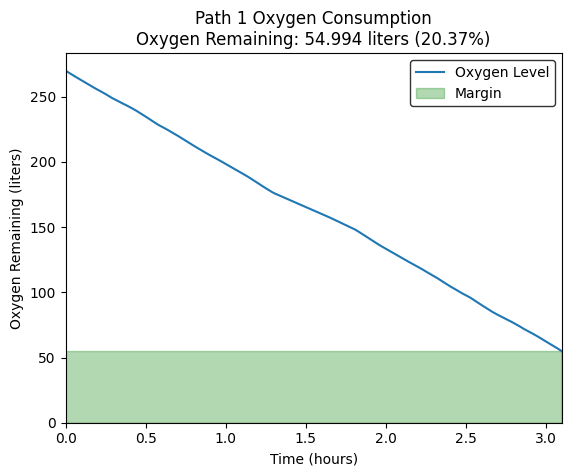

In [33]:
plt.plot(np.arange(1,time+1+time1)/3600,totalO2-np.cumsum(o2Consumed))
#plt.axhline(y=0, color = 'r', linestyle = '--',linewidth=3)
plt.fill_between(np.arange(1,time+1+time1)/3600, totalO2-np.cumsum(o2Consumed)[-1],0, color='green',alpha=0.3)
plt.xlabel('Time (hours)')
plt.ylabel('Oxygen Remaining (liters)')
plt.xlim([0,(time+time1+1)/3600])
plt.ylim(0)
plt.title(f"Path 1 Oxygen Consumption\nOxygen Remaining: {round(totalO2-np.cumsum(o2Consumed)[-1],3)} liters ({round(((totalO2-np.cumsum(o2Consumed)[-1])/totalO2)*100,2)}%)")
plt.legend(['Oxygen Level','Margin'],edgecolor='black')
plt.show()

In [34]:
distanceTraveled = 0
distanceTraveledIntermediate = 0
counter = 0
time = 0
dt = 1
metabolicRate = []
o2Consumed = []

while distanceTraveled < path2Distance:
   
    walking_speed,dh_dx = tobler(df.iloc[999-iCoords2[counter][1],iCoords2[counter][0]])
    met_rate = energyExpenditure(astroWeight,walking_speed,dh_dx)
    metabolicRate.append(met_rate)
    o2_consumption = o2Consumption(met_rate,dt)
    o2Consumed.append(o2_consumption)
    
    S = walking_speed*(5/18) # m/s
    distance = S*dt # m
    distanceTraveled += distance
    distanceTraveledIntermediate += distance
    time = timeElapsed(time,dt)
    
    #print(f"Distance Traveled: {distanceTraveled}, Slope: {df.iloc[999-iCoords1[counter][1],iCoords1[counter][0]]}")

    if distanceTraveledIntermediate >= path2NodeLength:
        counter += 1
        distanceTraveledIntermediate = 0

    else:
        pass


In [35]:
time1 = time 
scienceTime = 0
scienceMetRate = 267

while scienceTime < 30*60:
    # met_rate = energyExpenditure(100,walking_speed=0,dh_dx=0)
    # https://ntrs.nasa.gov/citations/19760005584
    met_rate = scienceMetRate/3600
    metabolicRate.append(met_rate)
    o2_consumption = o2Consumption(met_rate,dt)
    o2Consumed.append(o2_consumption)
    scienceTime+=dt
    time = timeElapsed(time,dt)

    if scienceTime >= 20*60:
        scienceMetRate = 289

peakMetabolicRate = max(metabolicRate)
metabolicRate.extend(list(reversed(metabolicRate[0:time1])))
o2Consumed.extend(list(reversed(o2Consumed[0:time1])))

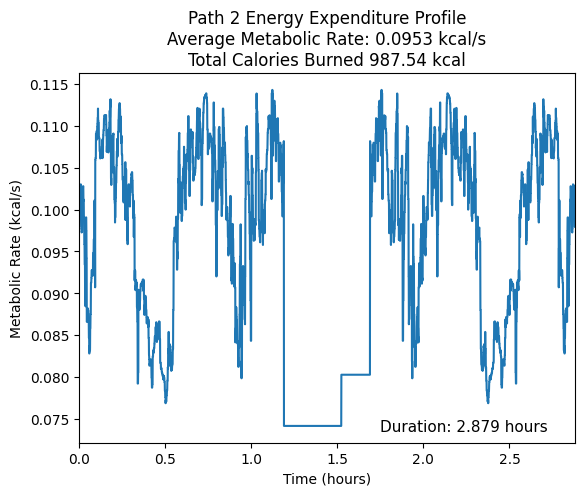

In [36]:
plt.plot(np.arange(1,time+1+time1)/3600,metabolicRate)
#plt.plot((metabolicRate.index(peakMetabolicRate)+1)/3600,peakMetabolicRate,marker='o', color='r',  markersize=5)
plt.xlabel('Time (hours)')
plt.ylabel('Metabolic Rate (kcal/s)')
plt.xlim([0,(time+time1+1)/3600])
plt.title(f"Path 2 Energy Expenditure Profile\nAverage Metabolic Rate: {round(np.mean(metabolicRate),4)} kcal/s\nTotal Calories Burned {round(sum(metabolicRate),2)} kcal")
plt.text(1.75,0.0735,f'Duration: {round((time+time1)/3600,3)} hours',fontsize=11)
plt.show()

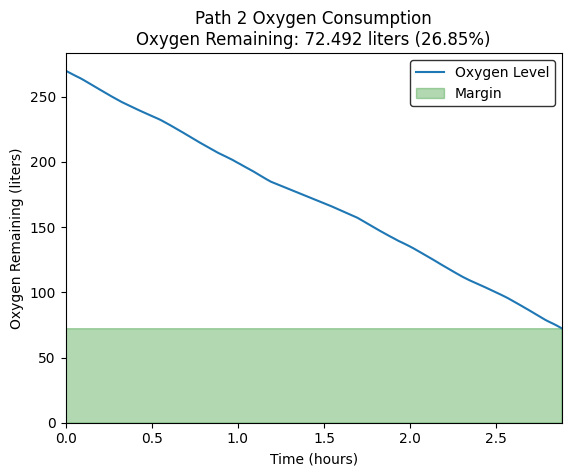

In [37]:
plt.plot(np.arange(1,time+1+time1)/3600,totalO2-np.cumsum(o2Consumed))
#plt.axhline(y=0, color = 'r', linestyle = '--',linewidth=3)
plt.fill_between(np.arange(1,time+1+time1)/3600, totalO2-np.cumsum(o2Consumed)[-1],0, color='green',alpha=0.3)
plt.xlabel('Time (hours)')
plt.ylabel('Oxygen Remaining (liters)')
plt.xlim([0,(time+time1+1)/3600])
plt.ylim(0)
plt.title(f"Path 2 Oxygen Consumption\nOxygen Remaining: {round(totalO2-np.cumsum(o2Consumed)[-1],3)} liters ({round(((totalO2-np.cumsum(o2Consumed)[-1])/totalO2)*100,2)}%)")
plt.legend(['Oxygen Level','Margin'],edgecolor='black')
plt.show()

In [38]:
distanceTraveled = 0
distanceTraveledIntermediate = 0
counter = 0
time = 0
dt = 1
metabolicRate = []
o2Consumed = []

while distanceTraveled < path3Distance:
   
    walking_speed,dh_dx = tobler(df.iloc[999-iCoords3[counter][1],iCoords3[counter][0]])
    met_rate = energyExpenditure(astroWeight,walking_speed,dh_dx)
    metabolicRate.append(met_rate)
    o2_consumption = o2Consumption(met_rate,dt)
    o2Consumed.append(o2_consumption)
    
    S = walking_speed*(5/18) # m/s
    distance = S*dt # m
    distanceTraveled += distance
    distanceTraveledIntermediate += distance
    time = timeElapsed(time,dt)
    
    #print(f"Distance Traveled: {distanceTraveled}, Slope: {df.iloc[999-iCoords1[counter][1],iCoords1[counter][0]]}")

    if distanceTraveledIntermediate >= path3NodeLength:
        counter += 1
        distanceTraveledIntermediate = 0

    else:
        pass


In [39]:
time1 = time 
scienceTime = 0
scienceMetRate = 267

while scienceTime < 30*60:
    # met_rate = energyExpenditure(100,walking_speed=0,dh_dx=0)
    # https://ntrs.nasa.gov/citations/19760005584
    met_rate = scienceMetRate/3600
    metabolicRate.append(met_rate)
    o2_consumption = o2Consumption(met_rate,dt)
    o2Consumed.append(o2_consumption)
    scienceTime+=dt
    time = timeElapsed(time,dt)

    if scienceTime >= 20*60:
        scienceMetRate = 289

peakMetabolicRate = max(metabolicRate)
metabolicRate.extend(list(reversed(metabolicRate[0:time1])))
o2Consumed.extend(list(reversed(o2Consumed[0:time1])))

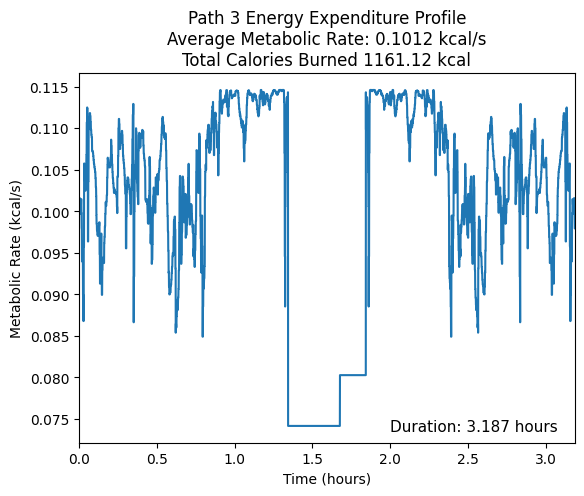

In [40]:
plt.plot(np.arange(1,time+1+time1)/3600,metabolicRate)
#plt.plot((metabolicRate.index(peakMetabolicRate)+1)/3600,peakMetabolicRate,marker='o', color='r',  markersize=5)
plt.xlabel('Time (hours)')
plt.ylabel('Metabolic Rate (kcal/s)')
plt.xlim([0,(time+time1+1)/3600])
plt.title(f"Path 3 Energy Expenditure Profile\nAverage Metabolic Rate: {round(np.mean(metabolicRate),4)} kcal/s\nTotal Calories Burned {round(sum(metabolicRate),2)} kcal")
plt.text(2,0.0735,f'Duration: {round((time+time1)/3600,3)} hours',fontsize=11)
plt.show()

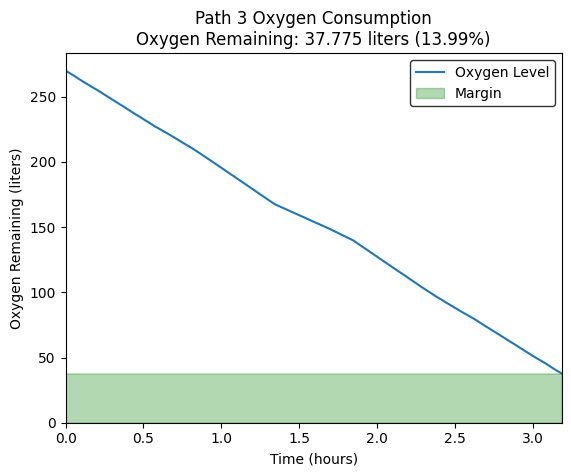

In [41]:
plt.plot(np.arange(1,time+1+time1)/3600,totalO2-np.cumsum(o2Consumed))
#plt.axhline(y=0, color = 'r', linestyle = '--', linewidth=3)
plt.fill_between(np.arange(1,time+1+time1)/3600, totalO2-np.cumsum(o2Consumed)[-1],0, color='green',alpha=0.3)
plt.xlabel('Time (hours)')
plt.ylabel('Oxygen Remaining (liters)')
plt.xlim([0,(time+time1+1)/3600])
plt.ylim(0)
plt.title(f"Path 3 Oxygen Consumption\nOxygen Remaining: {round(totalO2-np.cumsum(o2Consumed)[-1],3)} liters ({round(((totalO2-np.cumsum(o2Consumed)[-1])/totalO2)*100,2)}%)")
plt.legend(['Oxygen Level','Margin'],edgecolor='black')
plt.show()

In [45]:
# # Define the path to your original CSV file
# csv_file_path = 'slopeFinal.csv'

# # Load the original CSV file
# df = pd.read_csv(csv_file_path, header=None)
# # Determine the number of rows and columns in the grid
# num_rows, num_columns = df.shape

# # Create X and Y coordinates based on the grid structure
# x_coords = np.arange(0, num_columns)
# y_coords = np.arange(0, num_rows)

# # Create a mesh grid for X and Y coordinates
# x_mesh, y_mesh = np.meshgrid(x_coords, y_coords)

# # Reshape the X and Y coordinates into 1D arrays
# x_values = x_mesh.ravel()
# y_values = y_mesh.ravel()

# # Reshape the slope values into a 1D array
# slope_values = df.values.ravel()

# # Create a new DataFrame with X, Y, and slope columns
# new_df = pd.DataFrame({'X': x_values, 'Y': y_values, 'Slope': slope_values})

# # Save the new DataFrame to a CSV file
# output_csv_file = 'paraview_slope_data.csv'
# new_df.to_csv(output_csv_file, index=False)

# print(f"Converted data saved to {output_csv_file}")


Converted data saved to paraview_slope_data.csv
